In [ ]:
# In this script we reproduce what was done in:
# Nathalie Raveu et al. “Modal Theory for Waveguides With Anisotropic Surface Impedance Boundaries”. 
# In: IEEE Transactions on Microwave Theory and Techniques 64.4 (2016), pp. 1153–1162. doi: 10.1109/TMTT.2016.2533387

In [1]:
# For easy handeling of plots
%matplotlib widget

# Importing modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.signal import find_peaks
import scipy.constants as sc

In [ ]:
# We start with rectangular waveguides and the m=0 modes

# WR90
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
# zt = 0
zt = -1j/2

freq = 10e9
omega = 2*np.pi*freq

# Testing the root finding
# The dispersion equation (64) i.e. m = 0
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
    X = np.exp(-1j*2*kc*a, dtype = complex)
    
    f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))

    return f

# Plotting

x = np.linspace(1, 1000, 10000)
fig, ax = plt.subplots()
ax.plot(x, f_of_kc(x))

ax.set_ylabel("f($k_c$) @ 10GHz")
ax.set_xlabel("$k_c$")

ax.set_ylim(-0.5, 10)
plt.grid(True)
plt.show()

# The issue here is to find all possible zeros and to place them correctly into a matrix
# The root finding algorithm was not working as I would have liked. Another idea
# would be using the peak finding:

# Find the zeros as peaks: n.b. The "-" is mandatory, since it defines as peaks
# the zeros (thanks to the abs)
kcs = find_peaks(-f_of_kc(x)) 

# The idexes of the zeros are:
print(f'Indexes of zeros: {kcs[0]}')

# Add to the plot to see
for i in kcs[0]:
    ax.scatter(x[i], f_of_kc(x)[i])

# The issue with this method is that we need to have enough resolution nearby
# the peaks to be able to "see" them...


In [ ]:
# Root finding for f(kc) (OLD)

# For m = 0
# Defining a freqeuncy array
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

# Predefining kc, we look for one kc per each frequency point.
# In truth we need another dimension that is n (i.e. for each frequency, the first zero is n=0, the second n=1...)
kc = np.zeros_like(omega)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        X = np.exp(-1j*2*kc*a, dtype = complex)

        f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))
        
        return f
    
    root = fsolve(f_of_kc, 1)
    kc[idx] = root

# Very bad, instead of checking for all the roots of the equation, we just assume they are integer multiples
# Not nice, but working.

n = 1 # Mode number
kc = np.array(kc)*(n)
display(kc)

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2


In [ ]:
# Root finding for f(kc) (NEW 10/01/2024)

# WR90
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
# zt = 0
zt = -1j/2

# For m = 0
# Defining a freqeuncy array
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

# Predefining kc, we look for one kc per each frequency point.
# In truth we need another dimension that is n (i.e. for each frequency, the first zero is n=0, the second n=1...)
# kc = np.zeros_like(omega)

# This is the number of zeros (i.e. the index n) that I will be looking for
n_modes = 3
kc = np.zeros([len(omega), n_modes])
display(kc)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (64)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        X = np.exp(-1j*2*kc*a, dtype = complex)

        f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))
        
        return f
    
    # Find the zeros as peaks
    # I need to define a kc array (which gives the resolution of the peak finding)
    x = np.linspace(1, 1000, 10000) # Hard coded, NOT NICE!
    
    roots_idx = find_peaks(-f_of_kc(x))[0]
    roots = x[roots_idx]

    # kc is a matrix of len(omega) rows and 3 columns (n=0, n=1, n=2)
    kc[idx] = roots[:n_modes]

display(kc)
n = 1 # Mode number

# Final computations for dispersion curves
k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
# But I am computing more modes, I need a matrix
k0 = np.tile(k0, (n_modes, 1)).T

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2

display(kc[:, 0])

In [ ]:
n = 1 # Mode number

# The analytical dispersion equation for a rectangular waveguide

m = 0
ky_= m*np.pi/b
kx_= n*np.pi/a

k0_ = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
kc_ = np.ones_like(k0[:,0])*np.sqrt(kx_**2 + ky_**2)

gamma_ = np.sqrt(kc_**2 - k0_**2, dtype=complex)
eps_eff_ = (np.imag(gamma_)/k0_)**2


# Plotting the dispersion diagram (as in the paper)

fig, ax = plt.subplots()

ax.plot(k0[:, 0]*a, eps_eff[:, n-1], marker = "s", markevery=20, label =f"TE{n}0")
ax.plot(k0[:, 0]*a, eps_eff[:, n], marker = "s", markevery=20, label =f"TE{n+1}0")
ax.plot(k0[:, 0]*a, eps_eff[:, n+1], marker = "s", markevery=20, label =f"TE{n+2}0")
ax.plot(k0_*a, eps_eff_, marker = "s", markevery=25, label =f"TE{n}0 analytical")
# ax.plot(k0*a, eps_eff, marker = "s", markevery=20, label =f"TE{n}0")
ax.set_ylabel('$\epsilon_{eff}$')
ax.set_xlabel('$k_0 a$')

ax.set_ylim(0, 5)

ax.grid(True, color='gray', linestyle=':')
ax.legend()

plt.show()


In [ ]:
# For m > 0

a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide
zt = 0
zt = -1j/2 # Why negative?
zz = 0

freq = 10e9
omega = 2*np.pi*freq

# Testing the root finding
# The dispersion equation (49)
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

    m = 1
    ky = m*np.pi/b
    kx = np.sqrt(kc**2-ky**2, dtype = complex)
    gamma = np.sqrt(kc**2-k0**2, dtype = complex)

    X = np.exp(-1j*2*kx*a, dtype = complex)
    
    K0xc = k0*kx/kc**2
    Kzyc = gamma*ky/kc**2

    f = np.abs(
        2*Kzyc**2*zz*(-zt+(X+1)/(1-X)*K0xc*(zz*zt+1)-K0xc**2*zz)
        + (Kzyc**4+K0xc**4)*zz**2-2*K0xc**3*(X+1)/(1-X)*zz*(zz*zt+1)
        + K0xc**2*(1+(zz*zt)**2+4*((X+1)/(1-X))**2*zz*zt)
        - 2*K0xc*(X+1)/(1-X)*zt*(1+zz*zt)
        + zt**2
        )

    return f

# Plotting

x = np.linspace(1, 1000, 10000)
fig, ax = plt.subplots()
ax.plot(x, f_of_kc(x))

ax.set_ylabel("f($k_c$) @ 10GHz")
ax.set_xlabel("$k_c$")

ax.set_ylim(-0.5, 10)
plt.grid(True)
plt.show()

# Find the zeros as peaks: n.b. The "-" is mandatory, since it defines as peaks
# the zeros (thanks to the abs)
kcs = find_peaks(-f_of_kc(x)) 

# The idexes of the zeros are:
print(f'Indexes of zeros: {kcs[0]}')

# Add to the plot to see
for i in kcs[0]:
    ax.scatter(x[i], f_of_kc(x)[i])

# n.b. I find only one zero... so there are no higer order modes?

In [ ]:
# Root finding for f(kc) (NEW 10/01/2024)

# WR90
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide

zt = -1j/2 # Why negative?
# zt = 0 # This is not allowed for m > 0
zz = 0

# For m > 0
# !n.b. While m=0 can be validated for zz = 0 and zt = 0
# Defining a freqeuncy array
freq = np.geomspace(1e6, 2e10, 1001)
omega = 2*np.pi*freq

# Predefining kc, we look for one kc per each frequency point.
# In truth we need another dimension that is n (i.e. for each frequency, the first zero is n=0, the second n=1...)
# kc = np.zeros_like(omega)

# This is the number of zeros (i.e. the index n) that I will be looking for
n_modes = 3
kc = np.zeros([len(omega), n_modes])
display(kc)

for idx, w in enumerate(omega):

    # I have to define the function again, otherwise it does not recognize omega
    # The dispersion equation (49)
    def f_of_kc(kc):

        k0 = w*np.sqrt(sc.epsilon_0*sc.mu_0)

        m = 1
        ky = m*np.pi/b
        kx = np.sqrt(kc**2-ky**2, dtype = complex)
        gamma = np.sqrt(kc**2-k0**2, dtype = complex)

        X = np.exp(-1j*2*kx*a, dtype = complex)
        
        K0xc = k0*kx/kc**2
        Kzyc = gamma*ky/kc**2

        f = np.abs(
            2*Kzyc**2*zz*(-zt+(X+1)/(1-X)*K0xc*(zz*zt+1)-K0xc**2*zz)
            + (Kzyc**4+K0xc**4)*zz**2-2*K0xc**3*(X+1)/(1-X)*zz*(zz*zt+1)
            + K0xc**2*(1+(zz*zt)**2+4*((X+1)/(1-X))**2*zz*zt)
            - 2*K0xc*(X+1)/(1-X)*zt*(1+zz*zt)
            + zt**2
            )

        return f
    
    # Find the zeros as peaks
    # I need to define a kc array (which gives the resolution of the peak finding)
    x = np.linspace(1, 600, 20000) # Hard coded, NOT NICE!
    
    roots_idx = find_peaks(-f_of_kc(x))[0]
    roots = x[roots_idx]

    # kc is a matrix of len(omega) rows and 3 columns (n=0, n=1, n=2)
    kc[idx] = roots[:n_modes]

# Final computations for dispersion curves
k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
# But I am computing more modes, I need a matrix
k0 = np.tile(k0, (n_modes, 1)).T

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

eps_eff = (np.imag(gamma)/k0)**2

display(kc[:, 0])

In [ ]:
n = 1 # Mode number

# Plotting the dispersion diagram (as in the paper)

fig, ax = plt.subplots()

ax.plot(k0[:, 0]*a, eps_eff[:, n-1], marker = "s", markevery=20, label =f"TE{n}1")
# ax.plot(k0*a, eps_eff, marker = "s", markevery=20, label =f"TE{n}0")
ax.set_ylabel('$\epsilon_{eff}$')
ax.set_xlabel('$k_0 a$')

ax.set_ylim(0, 5)

ax.grid(True, color='gray', linestyle=':')
ax.legend()

plt.show()

### Computing field distributions for the TE10 in the WR90 @ 10GHz

In [29]:
# Here we follow [Benedikt Byrne. “Etude et conception de guides d’onde et 
# d’antennes cornets `a m ́etamat ́eriaux”. PhD thesis. Nov. 2016. url: https://oatao.univ-toulouse.fr/172 [Byr16]

# For m = 0, we are trying with TE10

# The waveguide (WR90)
a = 22.86e-3 # Long side of waveguide
b = 10.16e-3 # Short side of waveguide

# The FSS (at the moment PEC)
zz = 0
zt = 0

# Computation only at one frequency
freq = 10e9 # Hz
omega = 2*np.pi*freq

# The dispersion equation (64) i.e. m = 0
def f_of_kc(kc):

    k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)
    X = np.exp(-1j*2*kc*a, dtype = complex)
    
    f = np.abs(zt**2*(1-X) - 2*k0/kc*zt*(1+X) + (k0/kc)**2 * (1-X))

    return f

# The root finding algorithm was not working as I would have liked. Another idea
# would be using the peak finding:

# Find the zeros as peaks: n.b. The "-" is mandatory, since it defines as peaks
# the zeros (thanks to the abs)

x = np.linspace(1, 1000, 10000) # Hard coded, NOT NICE!

roots_idx = find_peaks(-f_of_kc(x))[0]
roots = x[roots_idx]

# kc is a vector of n_modes elements (n=0, n=1, n=2...)
n_modes = 3
kc = roots[:n_modes]

# But I want only one value
n = 1
kc = kc[n-1]

# To construct the matrix ([Byr16, Eq. 2.91]) we need these parameters

k0 = omega*np.sqrt(sc.epsilon_0*sc.mu_0)

ky = 0
kx = np.sqrt(kc**2 - ky**2, dtype=complex)

gamma = np.sqrt(kc**2 - k0**2, dtype=complex)

X = np.exp(-1j*2*kc*a, dtype = complex)
Z0 = np.sqrt(sc.mu_0/sc.epsilon_0)

[[        0.            +0.j                 0.            +0.j
  -10854752.60651526    +0.j          10854752.60651526    +0.j        ]
 [        0.            +0.j                 0.            +0.j
  -10854724.75514792+24589.40074014j  10854752.60651526    +0.j        ]
 [  7120179.81424876    +0.j           7120179.81424876    +0.j
          0.            +0.j                 0.            +0.j        ]
 [ -7120161.54513193+16129.42838415j  -7120179.81424876    +0.j
          0.            +0.j                 0.            +0.j        ]]


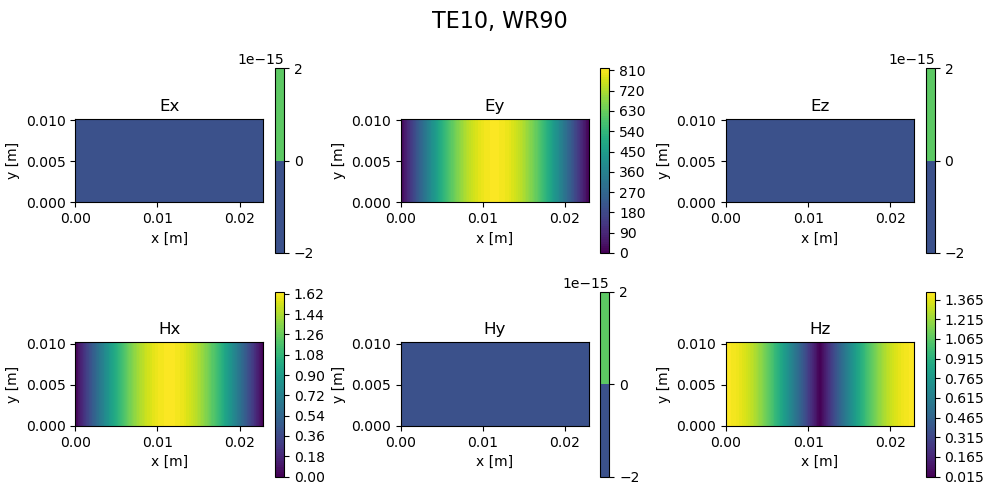

In [30]:
# To solve the system of equation in [Byr16, Eq. 2.91] we need to:

# 1. Build the matrix
M = np.array([[gamma*ky, gamma*ky, zt*Z0*kc**2-Z0*k0*kx, zt*Z0*kc**2+Z0*k0*kx],
              [gamma*ky*X, gamma*ky, -(zt*Z0*kc**2+Z0*k0*kx)*X, -zt*Z0*kc**2+Z0*k0*kx],
              [-zz*Z0*k0*kx+kc**2*Z0, zz*Z0*k0*kx+kc**2*Z0, zz*Z0*gamma*ky*Z0, zz*Z0*gamma*ky*Z0],
              [-(zz*Z0*k0*kx+kc**2*Z0)*X, zz*Z0*k0*kx-kc**2*Z0, zz*Z0*gamma*ky*Z0*X, zz*Z0*gamma*ky*Z0]])

print(M)

# Solve the eq.
def solution(U):
    # find the eigenvalues and eigenvector of U(transpose).U
    e_vals, e_vecs = np.linalg.eig(np.dot(U.T, U))  
    # extract the eigenvector (column) associated with the minimum eigenvalue
    return e_vecs[:, np.argmin(e_vals)] 

# This is a vector [Gamma+ Gamma- Psi+ Psi-]
[Gammap, Gammam, Psip, Psim] = solution(M)

# Compute all the fields:
# We still need the dependace from z
def compute_fields(x, y):
    # Supporting pieces
    Ap = (Gammam*np.exp(1j*kx*x, dtype = complex)+Gammap*np.exp(-1j*kx*x, dtype = complex))
    Bp = (Psim*np.exp(1j*kx*x, dtype = complex)+Psip*np.exp(-1j*kx*x, dtype = complex))

    Am = (Gammam*np.exp(1j*kx*x, dtype = complex)-Gammap*np.exp(-1j*kx*x, dtype = complex))
    Bm = (Psim*np.exp(1j*kx*x, dtype = complex)-Psip*np.exp(-1j*kx*x, dtype = complex))


    Ex = -1j*(gamma*kx*Am-Z0*k0*ky*Bp)*np.sin(ky*y)/(kc**2)
    Ey = -(gamma*ky*Ap-Z0*k0*kx*Bm)*np.cos(ky*y)/(kc**2)
    Ez = Ap*np.sin(ky*y)

    Hx = -1j*(k0*ky*Ap-Z0*gamma*kx*Bm)*np.cos(ky*y)/(Z0*kc**2)
    Hy = -(k0*kx*Am+Z0*gamma*ky*Bp)*np.sin(ky*y)/(Z0*kc**2)
    Hz = Bp*np.cos(ky*y)

    return [Ex, Ey, Ez, Hx, Hy, Hz]

# Generate a grid of x and y values
x_values = np.linspace(0, a, 100)  # 100 points between 0 and a
y_values = np.linspace(0, b, 100)  # 100 points between 0 and b

# Create a meshgrid from x and y values
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Evaluate the function for each combination of x and y
z_values = np.abs(compute_fields(x_mesh, y_mesh))

# Create a subplot with contourf
fig, ax = plt.subplots(2,3, figsize=(10, 5))

labels = ["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(x_mesh, y_mesh, z_values[idx], cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle('TE10, WR90', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

# Still a couple of things to do:
# 1. The normalization so that the L2 norm is unity (or, more easly, we normalize so that the max is 1)
# !n.b. Normalize only for the benchmark, for the calculations of power loss no need
# 2. Benchmark with TE10 very well known equations...

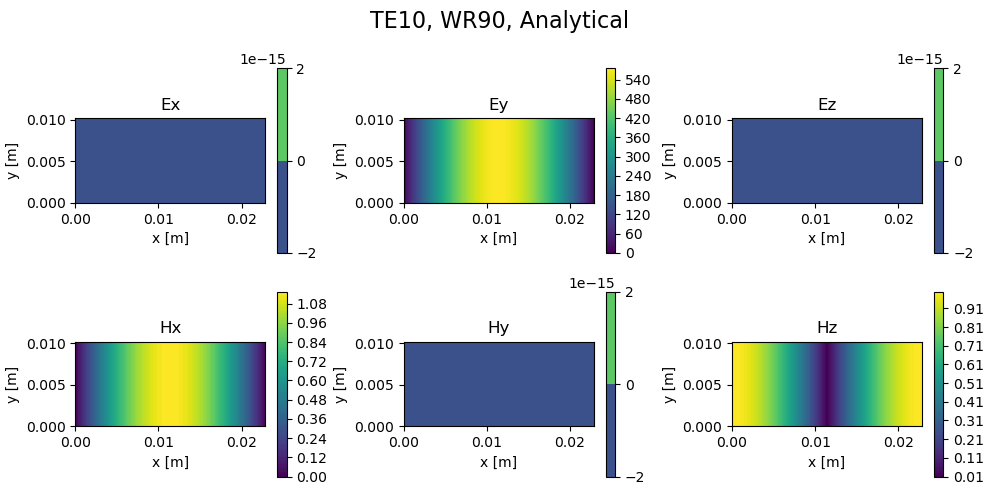

In [32]:
# Benchmark of the fields distributions

# The analytical dispersion equation for a rectangular waveguide

n = 1 # Mode number
m = 0

ky= m*np.pi/b
kx= n*np.pi/a

f = 10e9
k0 = 2*np.pi*f*np.sqrt(sc.epsilon_0*sc.mu_0)
kc = np.sqrt(kx**2 + ky**2)

gamma_ = np.sqrt(kc**2 - k0**2, dtype=complex)

labels = ["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]

def compute_fields(x,y):
    Ex = 0*x*y
    Hx = 1j*gamma/kc*np.sin(kx*x)
    Ey = -1j*k0/kc*Z0*np.sin(kx*x)
    Hy = 0*x*y
    Ez = 0*x*y
    Hz = np.cos(kx*x)*np.cos(ky*y)

    return [Ex, Ey, Ez, Hx, Hy, Hz]


# Generate a grid of x and y values
x_values = np.linspace(0, a, 100)  # 100 points between 0 and a
y_values = np.linspace(0, b, 100)  # 100 points between 0 and b

# Create a meshgrid from x and y values
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Evaluate the function for each combination of x and y
z_values = np.abs(compute_fields(x_mesh, y_mesh))

# Create a subplot with contourf
fig, ax = plt.subplots(2,3, figsize=(10, 5))

labels = ["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(x_mesh, y_mesh, z_values[idx], cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle('TE10, WR90, Analytical', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Computation of the attenuation